### 02 Exercises 

In [2]:
# Import libraries 
import torch 
from torch import nn 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [3]:
# Make data 
X, y = make_moons(n_samples=1000, random_state=42)

X[:10], y[:10]

(array([[ 0.00872719,  0.36817352],
        [ 0.921384  , -0.49690497],
        [ 0.94022577, -0.49821192],
        [ 0.46587532, -0.34540571],
        [-0.85041204,  0.52611726],
        [ 0.56490116, -0.4003827 ],
        [ 0.29847979, -0.21264956],
        [ 0.00334744,  0.41824625],
        [ 1.63606473, -0.27163571],
        [ 0.65529317,  0.75537465]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
np.unique(y) 

array([0, 1], dtype=int64)

Only 0s and 1s means binary classification 

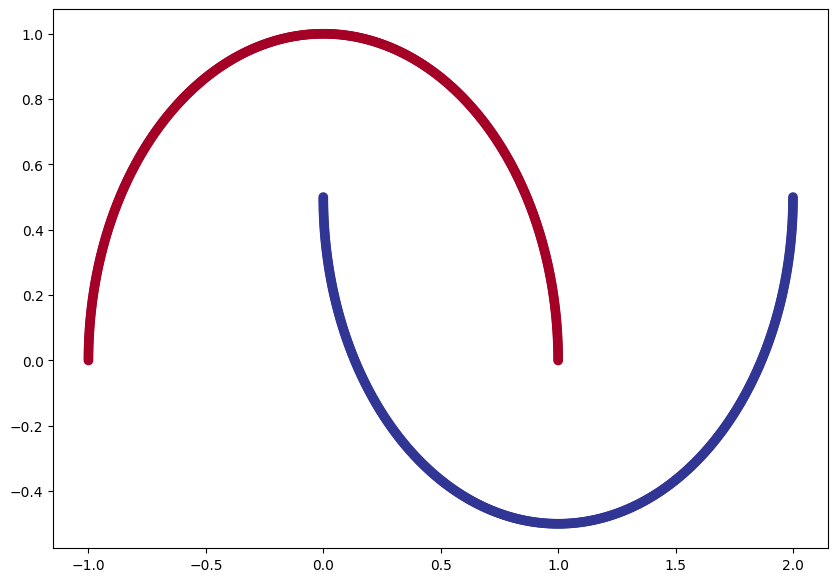

In [5]:
# Visualize 
plt.figure(figsize=(10, 7)) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);